In [ ]:
!pip install kaggle tensorflow


In [ ]:
import kagglehub

# Tải dataset từ Kaggle
path = kagglehub.dataset_download("ashishjangra27/face-mask-12k-images-dataset")

print("✅ Dataset downloaded to:", path)


100%|██████████| 330M/330M [00:02<00:00, 133MB/s]

Extracting files...


✅ Dataset downloaded to: /root/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1


In [ ]:
import os

base_dir = os.path.join(path, "Face Mask Dataset")
for folder in os.listdir(base_dir):
    print("📁", folder)
    for subfolder in os.listdir(os.path.join(base_dir, folder)):
        print("   └──", subfolder, ":", len(os.listdir(os.path.join(base_dir, folder, subfolder))), "ảnh")


📁 Train
   └── WithoutMask : 5000 ảnh
   └── WithMask : 5000 ảnh
📁 Validation
   └── WithoutMask : 400 ảnh
   └── WithMask : 400 ảnh
📁 Test
   └── WithoutMask : 509 ảnh
   └── WithMask : 483 ảnh


In [ ]:
import os

base_path = "/root/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1"

# Liệt kê thư mục chính
for item in os.listdir(base_path):
    print(item)


Face Mask Dataset


In [ ]:
import os

dataset_dir = "/root/.cache/kagglehub/datasets/ashishjangra27/face-mask-12k-images-dataset/versions/1/Face Mask Dataset"

train_dir = os.path.join(dataset_dir, "Train")
val_dir = os.path.join(dataset_dir, "Validation")
test_dir = os.path.join(dataset_dir, "Test")


In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE)
val_ds = tf.keras.utils.image_dataset_from_directory(val_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE)
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE)

# Prefetch để tăng tốc
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)


Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

# Tạo base model EfficientNet-B0
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # đóng băng feature extractor

# Tạo model phân loại
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')  # 2 lớp: WithMask / WithoutMask
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,052,133 (15.46 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 112ms/step - accuracy: 0.9673 - loss: 0.1047 - val_accuracy: 0.9987 - val_loss: 0.0117
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9963 - loss: 0.0133 - val_accuracy: 0.9987 - val_loss: 0.0078
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9970 - loss: 0.0095 - val_accuracy: 0.9987 - val_loss: 0.0063
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.9973 - loss: 0.0087 - val_accuracy: 0.9987 - val_loss: 0.0050
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9992 - loss: 0.0041 - val_accuracy: 0.9987 - val_loss: 0.0045
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.9981 - loss: 0.0051 - val_accuracy: 0.9987 - val_loss: 0.0055
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9984 - loss: 0.0046 - val_accuracy: 0.9987 - val_loss: 0.0049
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9989 - loss: 0.0036 -

In [ ]:
loss, acc = model.evaluate(test_ds)
print(f"✅ Test accuracy: {acc:.2%}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9941 - loss: 0.0134
✅ Test accuracy: 99.80%


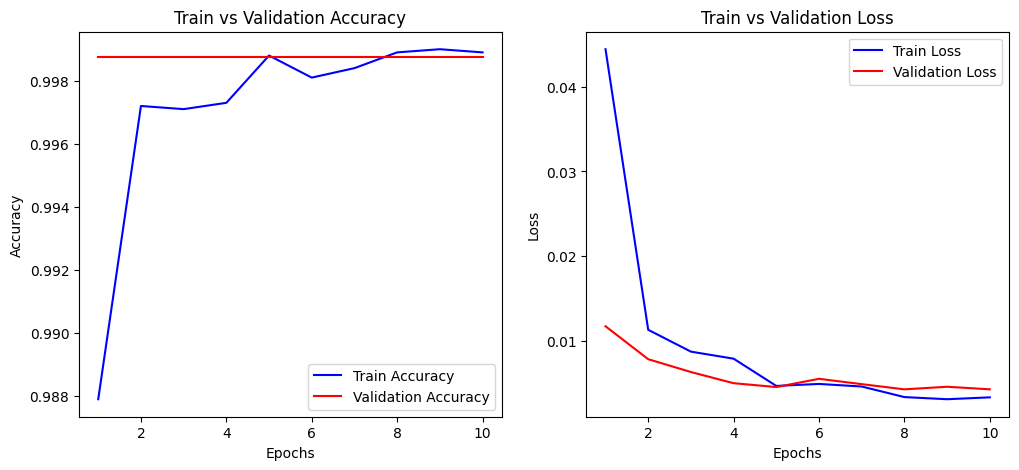

In [ ]:
import matplotlib.pyplot as plt

# Lấy dữ liệu từ history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

save_path = '/content/drive/MyDrive/FaceMask_EfficientNet'
os.makedirs(save_path, exist_ok=True)


In [ ]:
# Lưu cả mô hình legacy HDF5 (có warning)
model.save(os.path.join(save_path, "efficientnet_face_mask.h5"))

# Lưu toàn bộ mô hình native Keras (khuyên dùng)
model.save(os.path.join(save_path, "efficientnet_face_mask.keras"))

# Lưu dạng SavedModel (dùng cho TFServing/TFLite)
model.export(os.path.join(save_path, "efficientnet_face_mask_savedmodel"))


Saved artifact at '/content/drive/MyDrive/FaceMask_EfficientNet/efficientnet_face_mask_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_238')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  134788155379344: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  134788155377616: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  134788716840912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788716843792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788716843408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788716844560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788716841872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788716844368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134788716846480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Saving 470175316_597427142747451_6324105389662271905_n.jpg to 470175316_597427142747451_6324105389662271905_n.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


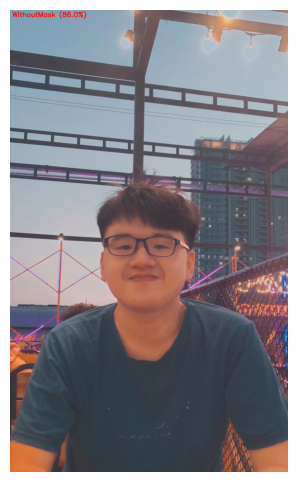

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab import files

# 1️⃣ Load model (native Keras)
model_path = "/content/drive/MyDrive/FaceMask_EfficientNet/efficientnet_face_mask.keras"
model = load_model(model_path)

# 2️⃣ Upload 1 ảnh từ local
uploaded = files.upload()  # Chọn file ảnh từ máy

for filename in uploaded.keys():
    img_path = filename

# 3️⃣ Đọc ảnh và chuẩn hóa
IMG_SIZE = (224, 224)
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, IMG_SIZE)

# ⚡ Preprocess đúng EfficientNet
img_array = np.expand_dims(img_resized, axis=0)
img_array = preprocess_input(img_array)  # thay cho /255.0

# 4️⃣ Dự đoán
pred = model.predict(img_array)
class_idx = np.argmax(pred, axis=1)[0]
classes = ['WithMask', 'WithoutMask']
label = classes[class_idx]
confidence = pred[0][class_idx]

# 5️⃣ Vẽ chữ lên ảnh
output_img = img_rgb.copy()
cv2.putText(
    output_img,
    f"{label} ({confidence*100:.1f}%)",
    (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX,
    1,
    (255, 0, 0),
    2,
    cv2.LINE_AA
)

# 6️⃣ Hiển thị ảnh
plt.figure(figsize=(6,6))
plt.imshow(output_img)
plt.axis('off')
plt.show()

# # 7️⃣ (Tuỳ chọn) Lưu ra Drive
# save_path = "/content/drive/MyDrive/FaceMask_EfficientNet/test_result.png"
# cv2.imwrite(save_path, cv2.cvtColor(output_img, cv2.COLOR_RGB2BGR))
# print(f"✅ Image saved to {save_path}")
